In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dataset_Final.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   final_tweet  4718 non-null   object
 1   sentiment    4718 non-null   object
dtypes: object(2)
memory usage: 73.8+ KB


In [4]:
df.head()

,final_tweet,sentiment
0,chatib basri kartu prakerja indikator orang pu...,negatif
1,kartu prakerja,netral
2,bbm roket tarif listrik roket garuda rugi krak...,netral
3,untung bukan insentif prakerja,netral
4,tuhan terimakasih rezeki insentif prakerja tah...,positif


In [5]:
text = df.final_tweet
sentiment = sentiment = pd.get_dummies(df['sentiment'])

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
 
def preprocessing_cnn(X_train,X_test,Test=False):
    tokenizer = Tokenizer(num_words=5000, oov_token='-')
    
    tokenizer.fit_on_texts(X_train)
    tokenizer.fit_on_texts(X_test) 
    sekuens_test = tokenizer.texts_to_sequences(X_test)
    padded_test = pad_sequences(sekuens_test)
    
    if Test == False :
        sekuens_train = tokenizer.texts_to_sequences(X_train)
        padded_train = pad_sequences(sekuens_train) 
        return padded_train, padded_test
        
    else :
        return padded_test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text,
                                                    sentiment, 
                                                    test_size = 0.3,
                                                    random_state = 123)

In [8]:
padded_train, padded_test = preprocessing_cnn(X_train,X_test)

# Model CNN - Bidirectional LSTM

In [9]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.LSTM(32)
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ] )
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         262272    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 1,585,667
Trainable params: 1,585,667
Non-trainable params: 0
______________________________________________

In [10]:
lr = 1e-7
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: lr * 10**(epoch / 15))
optimizer = tf.optimizers.Adam(lr=lr)
model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model_1.fit(padded_train,Y_train, epochs=100, callbacks=[lr_schedule])

Train on 3302 samples
Epoch 1/100
3302/3302 [==============================] - 30s 9ms/sample - loss: 1.0927 - accuracy: 0.4013
Epoch 2/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 1.0920 - accuracy: 0.3949
Epoch 3/100
3302/3302 [==============================] - 20s 6ms/sample - loss: 1.0927 - accuracy: 0.3916
Epoch 4/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 1.0913 - accuracy: 0.4082
Epoch 5/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 1.0919 - accuracy: 0.4022
Epoch 6/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 1.0909 - accuracy: 0.4046
Epoch 7/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 1.0908 - accuracy: 0.3995
Epoch 8/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 1.0899 - accuracy: 0.4140
Epoch 9/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0888 - accuracy: 0.4134
Epoch 10/100
3302/3302 [

3302/3302 [==============================] - 18s 6ms/sample - loss: 0.1857 - accuracy: 0.9382
Epoch 77/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.2073 - accuracy: 0.9346
Epoch 78/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.2407 - accuracy: 0.9261
Epoch 79/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 0.3830 - accuracy: 0.8692
Epoch 80/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 0.5970 - accuracy: 0.7835
Epoch 81/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 0.7270 - accuracy: 0.7078
Epoch 82/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 0.8481 - accuracy: 0.6439
Epoch 83/100
3302/3302 [==============================] - 18s 6ms/sample - loss: 0.9093 - accuracy: 0.5790
Epoch 84/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.9464 - accuracy: 0.5766
Epoch 85/100
3302/3302 [==========================

Text(0.5, 0, 'Learning Rate')

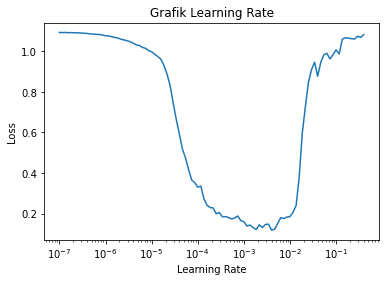

In [11]:
plt.title('Grafik Learning Rate')
plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-10, 1,0,4])
plt.ylabel('Loss')
plt.xlabel('Learning Rate')

In [12]:
index_min = history.history["loss"].index(min(history.history["loss"]))
best_lr = history.history["lr"][index_min]

print('Loss terkecil : ',history.history["loss"][index_min])
print('Learning Rate terbaik : ', best_lr)

Loss terkecil :  0.11912642687396668
Learning Rate terbaik :  0.0039810715


# CNN

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.GlobalMaxPooling1D(),
#     tf.keras.layers.LSTM(32)
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,546,499
Trainable params: 1,546,499
Non-trainable params: 0
____________________________________________

In [14]:
lr = 1e-7
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: lr * 10**(epoch / 15))
optimizer = tf.optimizers.Adam(lr=lr)
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model_2.fit(padded_train,Y_train, epochs=100, callbacks=[lr_schedule])

Train on 3302 samples
Epoch 1/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0972 - accuracy: 0.3655
Epoch 2/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0962 - accuracy: 0.3704
Epoch 3/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0953 - accuracy: 0.3801
Epoch 4/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0936 - accuracy: 0.3795
Epoch 5/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0928 - accuracy: 0.3749
Epoch 6/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0921 - accuracy: 0.3879
Epoch 7/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0906 - accuracy: 0.3907
Epoch 8/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0887 - accuracy: 0.3895
Epoch 9/100
3302/3302 [==============================] - 17s 5ms/sample - loss: 1.0877 - accuracy: 0.3916
Epoch 10/100
3302/3302 [

3302/3302 [==============================] - 16s 5ms/sample - loss: 0.3413 - accuracy: 0.8716
Epoch 78/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.6444 - accuracy: 0.7965
Epoch 79/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.8750 - accuracy: 0.6027
Epoch 80/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 1.0244 - accuracy: 0.5009
Epoch 81/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.9825 - accuracy: 0.4955
Epoch 82/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.9795 - accuracy: 0.4982
Epoch 83/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.9867 - accuracy: 0.4924
Epoch 84/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.9908 - accuracy: 0.4894
Epoch 85/100
3302/3302 [==============================] - 16s 5ms/sample - loss: 0.9856 - accuracy: 0.4933
Epoch 86/100
3302/3302 [==========================

Text(0.5, 0, 'Learning Rate')

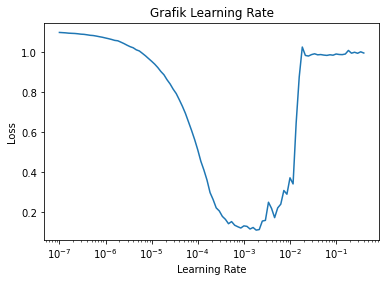

In [15]:
plt.title('Grafik Learning Rate')
plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-10, 1,0,4])
plt.ylabel('Loss')
plt.xlabel('Learning Rate')

In [16]:
index_min = history.history["loss"].index(min(history.history["loss"]))
best_lr = history.history["lr"][index_min]

print('Loss terkecil : ',history.history["loss"][index_min])
print('Learning Rate terbaik : ', best_lr)

Loss terkecil :  0.11083684678991601
Learning Rate terbaik :  0.0018478498


# CNN - LSTM

In [17]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
#     tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(32),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 1,564,035
Trainable params: 1,564,035
Non-trainable params: 0
____________________________________________

In [18]:
lr = 1e-7
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: lr * 10**(epoch / 15))
optimizer = tf.optimizers.Adam(lr=lr)
model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model_3.fit(padded_train,Y_train, epochs=100, callbacks=[lr_schedule])

Train on 3302 samples
Epoch 1/100
3302/3302 [==============================] - 21s 6ms/sample - loss: 1.0993 - accuracy: 0.3425
Epoch 2/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0989 - accuracy: 0.3440
Epoch 3/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0985 - accuracy: 0.3664
Epoch 4/100
3302/3302 [==============================] - 17s 5ms/sample - loss: 1.0980 - accuracy: 0.3798
Epoch 5/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0979 - accuracy: 0.3686
Epoch 6/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0979 - accuracy: 0.3640
Epoch 7/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 1.0972 - accuracy: 0.3758
Epoch 8/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 1.0977 - accuracy: 0.3689
Epoch 9/100
3302/3302 [==============================] - 19s 6ms/sample - loss: 1.0972 - accuracy: 0.3710
Epoch 10/100
3302/3302 [

3302/3302 [==============================] - 17s 5ms/sample - loss: 0.2551 - accuracy: 0.9185
Epoch 78/100
3302/3302 [==============================] - 17s 5ms/sample - loss: 0.3255 - accuracy: 0.8964
Epoch 79/100
3302/3302 [==============================] - 17s 5ms/sample - loss: 0.3735 - accuracy: 0.8846
Epoch 80/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.4570 - accuracy: 0.8504
Epoch 81/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.6343 - accuracy: 0.7544
Epoch 82/100
3302/3302 [==============================] - 17s 5ms/sample - loss: 0.6900 - accuracy: 0.7075
Epoch 83/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.7796 - accuracy: 0.6714
Epoch 84/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.8662 - accuracy: 0.6102
Epoch 85/100
3302/3302 [==============================] - 18s 5ms/sample - loss: 0.9519 - accuracy: 0.5439
Epoch 86/100
3302/3302 [==========================

Text(0.5, 0, 'Learning Rate')

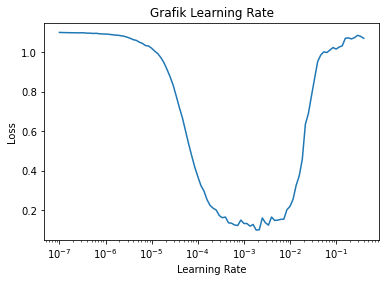

In [19]:
plt.title('Grafik Learning Rate')
plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-10, 1,0,4])
plt.ylabel('Loss')
plt.xlabel('Learning Rate')

In [20]:
index_min = history.history["loss"].index(min(history.history["loss"]))
best_lr = history.history["lr"][index_min]

print('Loss terkecil : ',history.history["loss"][index_min])
print('Learning Rate terbaik : ', best_lr)

Loss terkecil :  0.0989443252826598
Learning Rate terbaik :  0.0018478498
